In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import numpy as np
#Set some numpy print options for displaying numpy arrays to fit maximum width of cell
np.set_printoptions(precision=8, edgeitems=30, linewidth=1000,formatter=dict(float=lambda x: "%.8g" % x))

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,label_binarize
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [3]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout,LSTM
from keras.utils import np_utils

Using TensorFlow backend.


In [4]:
import matplotlib.pyplot as plt
from cmplotter import plot_confusion_matrix
%matplotlib inline

In [5]:
#load Dataset
data = pd.read_csv('data/2016_EGLL_Testdata_cleaned.csv', parse_dates = ['Landing_Time'], infer_datetime_format = True)
data.head()

,Landing_Time,hourofday,aircraft_registration,wind_direction_degrees,Wind_Speed_kt,Wind_And_Gust_kt,Landing_RVR_or_Vis_m,temperature_c,dew_point_c,relative_humidity,pressure_altimiter_in,RunwayTrueTrack,Landing_Visibilty_Class_RVR,present_weather_codes,Landing_RWY
0,2016-01-01 04:34:38,4,GXLEJ,NaN,1.0,1.0,6000.0,2.0,1.0,93.08,30.21,89.713523,VMC,NaN,RW09R
1,2016-01-01 04:38:22,4,GSTBH,NaN,1.0,1.0,6000.0,2.0,1.0,93.08,30.21,89.713523,VMC,NaN,RW09R
2,2016-01-01 04:40:38,4,GCIVH,110.0,1.0,1.0,6000.0,2.0,1.0,93.08,30.21,89.713523,VMC,NaN,RW09R
3,2016-01-01 04:42:36,4,GVYUM,110.0,1.0,1.0,6000.0,2.0,1.0,93.08,30.21,89.713523,VMC,NaN,RW09R
4,2016-01-01 04:44:43,4,GBYGB,110.0,1.0,1.0,6000.0,2.0,1.0,93.08,30.21,89.713523,VMC,NaN,RW09R


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220940 entries, 0 to 220939
Data columns (total 15 columns):
Landing_Time                   220940 non-null datetime64[ns]
hourofday                      220940 non-null int64
aircraft_registration          220799 non-null object
wind_direction_degrees         203226 non-null float64
Wind_Speed_kt                  220940 non-null float64
Wind_And_Gust_kt               220940 non-null float64
Landing_RVR_or_Vis_m           220940 non-null float64
temperature_c                  220940 non-null float64
dew_point_c                    220940 non-null float64
relative_humidity              220940 non-null float64
pressure_altimiter_in          220940 non-null float64
RunwayTrueTrack                220940 non-null float64
Landing_Visibilty_Class_RVR    220940 non-null object
present_weather_codes          33015 non-null object
Landing_RWY                    220940 non-null object
dtypes: datetime64[ns](1), float64(9), int64(1), object(4)
memor

In [7]:
# One-Hot Encoding Categorical Variables
data.set_index('Landing_Time',inplace = True)
data.drop(columns=['aircraft_registration'],inplace = True)
data = pd.get_dummies(data, columns=['Landing_Visibilty_Class_RVR', 'present_weather_codes'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 220940 entries, 2016-01-01 04:34:38 to 2016-12-30 23:57:49
Data columns (total 65 columns):
hourofday                                   220940 non-null int64
wind_direction_degrees                      203226 non-null float64
Wind_Speed_kt                               220940 non-null float64
Wind_And_Gust_kt                            220940 non-null float64
Landing_RVR_or_Vis_m                        220940 non-null float64
temperature_c                               220940 non-null float64
dew_point_c                                 220940 non-null float64
relative_humidity                           220940 non-null float64
pressure_altimiter_in                       220940 non-null float64
RunwayTrueTrack                             220940 non-null float64
Landing_RWY                                 220940 non-null object
Landing_Visibilty_Class_RVR_CAT1            220940 non-null uint8
Landing_Visibilty_Class_RVR_CAT2            

In [9]:
data[data.isnull().any(axis=1)]

,hourofday,wind_direction_degrees,Wind_Speed_kt,Wind_And_Gust_kt,Landing_RVR_or_Vis_m,temperature_c,dew_point_c,relative_humidity,pressure_altimiter_in,RunwayTrueTrack,...,present_weather_codes_SHRA,present_weather_codes_SHRA HZ,present_weather_codes_SHRA VCTS,present_weather_codes_TS,present_weather_codes_TSRA,present_weather_codes_VCFG,present_weather_codes_VCSH,present_weather_codes_VCTS,present_weather_codes_VCTS -SHRA,present_weather_codes_VCTS VCSH
Landing_Time,,,,,,,,,,,,,,,,,,,,,
2016-01-01 04:34:38,4,NaN,1.0,1.0,6000.0,2.0,1.0,93.08,30.21,89.713523,...,0,0,0,0,0,0,0,0,0,0
2016-01-01 04:38:22,4,NaN,1.0,1.0,6000.0,2.0,1.0,93.08,30.21,89.713523,...,0,0,0,0,0,0,0,0,0,0
2016-01-04 06:10:11,6,NaN,7.0,7.0,10000.0,6.0,5.0,93.30,29.03,269.713523,...,0,0,0,0,0,0,0,0,0,0
2016-01-04 06:10:50,6,NaN,7.0,7.0,10000.0,6.0,5.0,93.30,29.03,269.713523,...,0,0,0,0,0,0,0,0,0,0
2016-01-04 06:12:36,6,NaN,7.0,7.0,10000.0,6.0,5.0,93.30,29.03,269.713523,...,0,0,0,0,0,0,0,0,0,0
2016-01-04 06:13:39,6,NaN,7.0,7.0,10000.0,6.0,5.0,93.30,29.03,269.713523,...,0,0,0,0,0,0,0,0,0,0
2016-01-04 06:15:03,6,NaN,7.0,7.0,10000.0,6.0,5.0,93.30,29.03,269.713523,...,0,0,0,0,0,0,0,0,0,0
2016-01-04 06:16:04,6,NaN,7.0,7.0,10000.0,6.0,5.0,93.30,29.03,269.713523,...,0,0,0,0,0,0,0,0,0,0
2016-01-04 06:17:32,6,NaN,7.0,7.0,10000.0,6.0,5.0,93.30,29.03,269.713523,...,0,0,0,0,0,0,0,0,0,0


In [10]:
data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 203226 entries, 2016-01-01 04:40:38 to 2016-12-30 23:57:49
Data columns (total 65 columns):
hourofday                                   203226 non-null int64
wind_direction_degrees                      203226 non-null float64
Wind_Speed_kt                               203226 non-null float64
Wind_And_Gust_kt                            203226 non-null float64
Landing_RVR_or_Vis_m                        203226 non-null float64
temperature_c                               203226 non-null float64
dew_point_c                                 203226 non-null float64
relative_humidity                           203226 non-null float64
pressure_altimiter_in                       203226 non-null float64
RunwayTrueTrack                             203226 non-null float64
Landing_RWY                                 203226 non-null object
Landing_Visibilty_Class_RVR_CAT1            203226 non-null uint8
Landing_Visibilty_Class_RVR_CAT2            

In [11]:
# One Hot Encode categorical variable output
encoder = LabelEncoder()
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))

In [12]:
data_for_output = data.copy()
X_data = data_for_output.drop('Landing_RWY', axis=1)
X_data = scaler.fit_transform(X_data.values)
y = data_for_output.Landing_RWY

# Encode class values as integers
# encoded_Y = encoder.fit_transform(y)
encoded_Y = encoder.fit(y).transform(y)

# convert integers to dummy variables (i.e. one hot encoded)
y_data = np_utils.to_categorical(encoded_Y)

# print(encoded_Y)
# print(y_data)

In [13]:
#Split the dataset into train and Test
seed = 42
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size, random_state=seed)
print('Shape of train data:',X_train.shape, y_train.shape)
print('Shape of test data:',X_test.shape, y_test.shape)

Shape of train data: (142258, 64) (142258, 4)
Shape of test data: (60968, 64) (60968, 4)


In [14]:
lag_steps = 1
# reshape input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], lag_steps, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], lag_steps, X_test.shape[1]))

In [15]:
# print(X_train)
# print(X_test)
# print(y_test)
# print(y_train)

In [16]:
# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy):    
    n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
    model = Sequential()
    model.add(LSTM(100, input_shape=(n_timesteps,n_features)))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit network
    history = model.fit(trainX, trainy, epochs=1000, batch_size=64,validation_split=0.25, verbose=2)
    # evaluate model
    _, accuracy = model.evaluate(testX, testy, batch_size=64, verbose=2)    
    return history,accuracy

In [17]:
%%time
# summarize results
repeats=3
scores = list()
for r in range(repeats):
    history,score = evaluate_model(X_train, y_train, X_test, y_test)    
    print('Iteration >#%d: %.3f' % (r+1, score*100),'\n')
    scores.append(score)

Train on 106693 samples, validate on 35565 samples
Epoch 1/1000
 - 14s - loss: 0.5968 - acc: 0.6225 - val_loss: 0.5594 - val_acc: 0.6433
Epoch 2/1000
 - 12s - loss: 0.5627 - acc: 0.6367 - val_loss: 0.5595 - val_acc: 0.6269
Epoch 3/1000
 - 12s - loss: 0.5590 - acc: 0.6447 - val_loss: 0.5535 - val_acc: 0.6560
Epoch 4/1000
 - 12s - loss: 0.5557 - acc: 0.6515 - val_loss: 0.5529 - val_acc: 0.6583
Epoch 5/1000
 - 13s - loss: 0.5542 - acc: 0.6541 - val_loss: 0.5514 - val_acc: 0.6561
Epoch 6/1000
 - 13s - loss: 0.5521 - acc: 0.6582 - val_loss: 0.5503 - val_acc: 0.6647
Epoch 7/1000
 - 8s - loss: 0.5512 - acc: 0.6606 - val_loss: 0.5481 - val_acc: 0.6645
Epoch 8/1000
 - 7s - loss: 0.5493 - acc: 0.6623 - val_loss: 0.5468 - val_acc: 0.6663
Epoch 9/1000
 - 7s - loss: 0.5489 - acc: 0.6644 - val_loss: 0.5484 - val_acc: 0.6616
Epoch 10/1000
 - 7s - loss: 0.5479 - acc: 0.6650 - val_loss: 0.5444 - val_acc: 0.6772
Epoch 11/1000
 - 7s - loss: 0.5469 - acc: 0.6695 - val_loss: 0.5446 - val_acc: 0.6686
Epoch 

Epoch 96/1000
 - 7s - loss: 0.4658 - acc: 0.7610 - val_loss: 0.4305 - val_acc: 0.7944
Epoch 97/1000
 - 7s - loss: 0.4662 - acc: 0.7610 - val_loss: 0.4324 - val_acc: 0.7949
Epoch 98/1000
 - 7s - loss: 0.4657 - acc: 0.7609 - val_loss: 0.4302 - val_acc: 0.7964
Epoch 99/1000
 - 7s - loss: 0.4645 - acc: 0.7618 - val_loss: 0.4321 - val_acc: 0.7994
Epoch 100/1000
 - 7s - loss: 0.4640 - acc: 0.7627 - val_loss: 0.4268 - val_acc: 0.7981
Epoch 101/1000
 - 7s - loss: 0.4644 - acc: 0.7630 - val_loss: 0.4335 - val_acc: 0.7930
Epoch 102/1000
 - 7s - loss: 0.4642 - acc: 0.7626 - val_loss: 0.4322 - val_acc: 0.7884
Epoch 103/1000
 - 7s - loss: 0.4628 - acc: 0.7640 - val_loss: 0.4251 - val_acc: 0.7985
Epoch 104/1000
 - 7s - loss: 0.4627 - acc: 0.7636 - val_loss: 0.4232 - val_acc: 0.8008
Epoch 105/1000
 - 7s - loss: 0.4615 - acc: 0.7649 - val_loss: 0.4241 - val_acc: 0.7985
Epoch 106/1000
 - 7s - loss: 0.4613 - acc: 0.7641 - val_loss: 0.4219 - val_acc: 0.8040
Epoch 107/1000
 - 7s - loss: 0.4615 - acc: 0.76

Epoch 191/1000
 - 7s - loss: 0.4312 - acc: 0.7889 - val_loss: 0.3872 - val_acc: 0.8284
Epoch 192/1000
 - 7s - loss: 0.4313 - acc: 0.7889 - val_loss: 0.3828 - val_acc: 0.8271
Epoch 193/1000
 - 7s - loss: 0.4298 - acc: 0.7906 - val_loss: 0.3864 - val_acc: 0.8291
Epoch 194/1000
 - 7s - loss: 0.4300 - acc: 0.7895 - val_loss: 0.3845 - val_acc: 0.8323
Epoch 195/1000
 - 7s - loss: 0.4316 - acc: 0.7900 - val_loss: 0.3902 - val_acc: 0.8197
Epoch 196/1000
 - 7s - loss: 0.4302 - acc: 0.7889 - val_loss: 0.3835 - val_acc: 0.8282
Epoch 197/1000
 - 7s - loss: 0.4311 - acc: 0.7878 - val_loss: 0.3858 - val_acc: 0.8281
Epoch 198/1000
 - 7s - loss: 0.4285 - acc: 0.7919 - val_loss: 0.3847 - val_acc: 0.8262
Epoch 199/1000
 - 7s - loss: 0.4290 - acc: 0.7905 - val_loss: 0.3809 - val_acc: 0.8311
Epoch 200/1000
 - 7s - loss: 0.4291 - acc: 0.7909 - val_loss: 0.3810 - val_acc: 0.8293
Epoch 201/1000
 - 7s - loss: 0.4297 - acc: 0.7911 - val_loss: 0.3828 - val_acc: 0.8279
Epoch 202/1000
 - 7s - loss: 0.4291 - acc: 

 - 7s - loss: 0.4140 - acc: 0.8036 - val_loss: 0.3669 - val_acc: 0.8382
Epoch 286/1000
 - 7s - loss: 0.4130 - acc: 0.8034 - val_loss: 0.3592 - val_acc: 0.8458
Epoch 287/1000
 - 7s - loss: 0.4152 - acc: 0.8019 - val_loss: 0.3619 - val_acc: 0.8452
Epoch 288/1000
 - 7s - loss: 0.4144 - acc: 0.8005 - val_loss: 0.3659 - val_acc: 0.8407
Epoch 289/1000
 - 7s - loss: 0.4123 - acc: 0.8025 - val_loss: 0.3598 - val_acc: 0.8404
Epoch 290/1000
 - 7s - loss: 0.4141 - acc: 0.8019 - val_loss: 0.3671 - val_acc: 0.8405
Epoch 291/1000
 - 7s - loss: 0.4141 - acc: 0.8034 - val_loss: 0.3655 - val_acc: 0.8422
Epoch 292/1000
 - 7s - loss: 0.4124 - acc: 0.8024 - val_loss: 0.3601 - val_acc: 0.8438
Epoch 293/1000
 - 7s - loss: 0.4129 - acc: 0.8029 - val_loss: 0.3602 - val_acc: 0.8438
Epoch 294/1000
 - 7s - loss: 0.4134 - acc: 0.8027 - val_loss: 0.3605 - val_acc: 0.8394
Epoch 295/1000
 - 7s - loss: 0.4121 - acc: 0.8029 - val_loss: 0.3590 - val_acc: 0.8439
Epoch 296/1000
 - 8s - loss: 0.4122 - acc: 0.8040 - val_lo

Epoch 380/1000
 - 7s - loss: 0.4036 - acc: 0.8090 - val_loss: 0.3487 - val_acc: 0.8540
Epoch 381/1000
 - 7s - loss: 0.4020 - acc: 0.8118 - val_loss: 0.3441 - val_acc: 0.8563
Epoch 382/1000
 - 7s - loss: 0.4030 - acc: 0.8097 - val_loss: 0.3456 - val_acc: 0.8555
Epoch 383/1000
 - 8s - loss: 0.4006 - acc: 0.8116 - val_loss: 0.3464 - val_acc: 0.8511
Epoch 384/1000
 - 8s - loss: 0.4018 - acc: 0.8106 - val_loss: 0.3522 - val_acc: 0.8491
Epoch 385/1000
 - 7s - loss: 0.4019 - acc: 0.8121 - val_loss: 0.3461 - val_acc: 0.8524
Epoch 386/1000
 - 7s - loss: 0.4014 - acc: 0.8112 - val_loss: 0.3438 - val_acc: 0.8563
Epoch 387/1000
 - 7s - loss: 0.4022 - acc: 0.8123 - val_loss: 0.3451 - val_acc: 0.8550
Epoch 388/1000
 - 7s - loss: 0.4037 - acc: 0.8108 - val_loss: 0.3462 - val_acc: 0.8567
Epoch 389/1000
 - 7s - loss: 0.4018 - acc: 0.8105 - val_loss: 0.3469 - val_acc: 0.8520
Epoch 390/1000
 - 7s - loss: 0.4035 - acc: 0.8108 - val_loss: 0.3478 - val_acc: 0.8500
Epoch 391/1000
 - 7s - loss: 0.4030 - acc: 

 - 7s - loss: 0.3937 - acc: 0.8173 - val_loss: 0.3350 - val_acc: 0.8603
Epoch 475/1000
 - 7s - loss: 0.3941 - acc: 0.8171 - val_loss: 0.3388 - val_acc: 0.8598
Epoch 476/1000
 - 7s - loss: 0.3935 - acc: 0.8167 - val_loss: 0.3334 - val_acc: 0.8629
Epoch 477/1000
 - 7s - loss: 0.3935 - acc: 0.8172 - val_loss: 0.3387 - val_acc: 0.8579
Epoch 478/1000
 - 7s - loss: 0.3946 - acc: 0.8160 - val_loss: 0.3350 - val_acc: 0.8603
Epoch 479/1000
 - 7s - loss: 0.3947 - acc: 0.8170 - val_loss: 0.3380 - val_acc: 0.8586
Epoch 480/1000
 - 7s - loss: 0.3918 - acc: 0.8189 - val_loss: 0.3351 - val_acc: 0.8610
Epoch 481/1000
 - 7s - loss: 0.3929 - acc: 0.8181 - val_loss: 0.3348 - val_acc: 0.8607
Epoch 482/1000
 - 7s - loss: 0.3951 - acc: 0.8165 - val_loss: 0.3338 - val_acc: 0.8631
Epoch 483/1000
 - 7s - loss: 0.3933 - acc: 0.8170 - val_loss: 0.3353 - val_acc: 0.8611
Epoch 484/1000
 - 7s - loss: 0.3923 - acc: 0.8167 - val_loss: 0.3339 - val_acc: 0.8586
Epoch 485/1000
 - 7s - loss: 0.3914 - acc: 0.8179 - val_lo

Epoch 569/1000
 - 7s - loss: 0.3874 - acc: 0.8216 - val_loss: 0.3280 - val_acc: 0.8660
Epoch 570/1000
 - 7s - loss: 0.3866 - acc: 0.8220 - val_loss: 0.3318 - val_acc: 0.8652
Epoch 571/1000
 - 7s - loss: 0.3862 - acc: 0.8207 - val_loss: 0.3278 - val_acc: 0.8655
Epoch 572/1000
 - 7s - loss: 0.3866 - acc: 0.8218 - val_loss: 0.3296 - val_acc: 0.8655
Epoch 573/1000
 - 7s - loss: 0.3854 - acc: 0.8221 - val_loss: 0.3254 - val_acc: 0.8669
Epoch 574/1000
 - 7s - loss: 0.3869 - acc: 0.8221 - val_loss: 0.3301 - val_acc: 0.8621
Epoch 575/1000
 - 7s - loss: 0.3879 - acc: 0.8208 - val_loss: 0.3302 - val_acc: 0.8641
Epoch 576/1000
 - 7s - loss: 0.3854 - acc: 0.8225 - val_loss: 0.3273 - val_acc: 0.8677
Epoch 577/1000
 - 7s - loss: 0.3869 - acc: 0.8213 - val_loss: 0.3317 - val_acc: 0.8623
Epoch 578/1000
 - 7s - loss: 0.3859 - acc: 0.8223 - val_loss: 0.3261 - val_acc: 0.8679
Epoch 579/1000
 - 7s - loss: 0.3873 - acc: 0.8210 - val_loss: 0.3278 - val_acc: 0.8636
Epoch 580/1000
 - 7s - loss: 0.3847 - acc: 

 - 7s - loss: 0.3818 - acc: 0.8246 - val_loss: 0.3253 - val_acc: 0.8657
Epoch 664/1000
 - 7s - loss: 0.3802 - acc: 0.8265 - val_loss: 0.3226 - val_acc: 0.8689
Epoch 665/1000
 - 7s - loss: 0.3798 - acc: 0.8258 - val_loss: 0.3233 - val_acc: 0.8677
Epoch 666/1000
 - 7s - loss: 0.3822 - acc: 0.8252 - val_loss: 0.3236 - val_acc: 0.8704
Epoch 667/1000
 - 7s - loss: 0.3803 - acc: 0.8247 - val_loss: 0.3237 - val_acc: 0.8699
Epoch 668/1000
 - 7s - loss: 0.3816 - acc: 0.8238 - val_loss: 0.3233 - val_acc: 0.8676
Epoch 669/1000
 - 7s - loss: 0.3806 - acc: 0.8262 - val_loss: 0.3226 - val_acc: 0.8704
Epoch 670/1000
 - 7s - loss: 0.3802 - acc: 0.8260 - val_loss: 0.3240 - val_acc: 0.8653
Epoch 671/1000
 - 7s - loss: 0.3833 - acc: 0.8235 - val_loss: 0.3242 - val_acc: 0.8673
Epoch 672/1000
 - 7s - loss: 0.3810 - acc: 0.8241 - val_loss: 0.3238 - val_acc: 0.8680
Epoch 673/1000
 - 7s - loss: 0.3804 - acc: 0.8256 - val_loss: 0.3233 - val_acc: 0.8702
Epoch 674/1000
 - 7s - loss: 0.3818 - acc: 0.8251 - val_lo

Epoch 758/1000
 - 7s - loss: 0.3780 - acc: 0.8269 - val_loss: 0.3210 - val_acc: 0.8709
Epoch 759/1000
 - 7s - loss: 0.3772 - acc: 0.8277 - val_loss: 0.3198 - val_acc: 0.8693
Epoch 760/1000
 - 7s - loss: 0.3773 - acc: 0.8277 - val_loss: 0.3173 - val_acc: 0.8724
Epoch 761/1000
 - 7s - loss: 0.3762 - acc: 0.8287 - val_loss: 0.3185 - val_acc: 0.8710
Epoch 762/1000
 - 7s - loss: 0.3762 - acc: 0.8276 - val_loss: 0.3199 - val_acc: 0.8681
Epoch 763/1000
 - 7s - loss: 0.3769 - acc: 0.8276 - val_loss: 0.3177 - val_acc: 0.8730
Epoch 764/1000
 - 7s - loss: 0.3782 - acc: 0.8266 - val_loss: 0.3169 - val_acc: 0.8718
Epoch 765/1000
 - 7s - loss: 0.3781 - acc: 0.8275 - val_loss: 0.3197 - val_acc: 0.8702
Epoch 766/1000
 - 7s - loss: 0.3768 - acc: 0.8267 - val_loss: 0.3157 - val_acc: 0.8744
Epoch 767/1000
 - 7s - loss: 0.3763 - acc: 0.8279 - val_loss: 0.3156 - val_acc: 0.8729
Epoch 768/1000
 - 7s - loss: 0.3764 - acc: 0.8280 - val_loss: 0.3175 - val_acc: 0.8712
Epoch 769/1000
 - 7s - loss: 0.3756 - acc: 

 - 7s - loss: 0.3696 - acc: 0.8327 - val_loss: 0.3141 - val_acc: 0.8722
Epoch 853/1000
 - 7s - loss: 0.3732 - acc: 0.8297 - val_loss: 0.3128 - val_acc: 0.8734
Epoch 854/1000
 - 7s - loss: 0.3726 - acc: 0.8313 - val_loss: 0.3127 - val_acc: 0.8752
Epoch 855/1000
 - 7s - loss: 0.3746 - acc: 0.8301 - val_loss: 0.3146 - val_acc: 0.8729
Epoch 856/1000
 - 7s - loss: 0.3740 - acc: 0.8297 - val_loss: 0.3121 - val_acc: 0.8769
Epoch 857/1000
 - 7s - loss: 0.3737 - acc: 0.8305 - val_loss: 0.3148 - val_acc: 0.8715
Epoch 858/1000
 - 7s - loss: 0.3725 - acc: 0.8309 - val_loss: 0.3143 - val_acc: 0.8711
Epoch 859/1000
 - 7s - loss: 0.3719 - acc: 0.8310 - val_loss: 0.3123 - val_acc: 0.8753
Epoch 860/1000
 - 7s - loss: 0.3721 - acc: 0.8312 - val_loss: 0.3121 - val_acc: 0.8751
Epoch 861/1000
 - 7s - loss: 0.3724 - acc: 0.8318 - val_loss: 0.3094 - val_acc: 0.8766
Epoch 862/1000
 - 7s - loss: 0.3714 - acc: 0.8319 - val_loss: 0.3114 - val_acc: 0.8746
Epoch 863/1000
 - 7s - loss: 0.3746 - acc: 0.8291 - val_lo

Epoch 947/1000
 - 7s - loss: 0.3688 - acc: 0.8331 - val_loss: 0.3109 - val_acc: 0.8760
Epoch 948/1000
 - 7s - loss: 0.3683 - acc: 0.8341 - val_loss: 0.3086 - val_acc: 0.8788
Epoch 949/1000
 - 7s - loss: 0.3681 - acc: 0.8345 - val_loss: 0.3054 - val_acc: 0.8800
Epoch 950/1000
 - 7s - loss: 0.3693 - acc: 0.8342 - val_loss: 0.3078 - val_acc: 0.8791
Epoch 951/1000
 - 7s - loss: 0.3678 - acc: 0.8349 - val_loss: 0.3100 - val_acc: 0.8774
Epoch 952/1000
 - 8s - loss: 0.3675 - acc: 0.8356 - val_loss: 0.3080 - val_acc: 0.8784
Epoch 953/1000
 - 7s - loss: 0.3673 - acc: 0.8345 - val_loss: 0.3084 - val_acc: 0.8763
Epoch 954/1000
 - 7s - loss: 0.3696 - acc: 0.8333 - val_loss: 0.3102 - val_acc: 0.8772
Epoch 955/1000
 - 7s - loss: 0.3690 - acc: 0.8339 - val_loss: 0.3074 - val_acc: 0.8781
Epoch 956/1000
 - 7s - loss: 0.3665 - acc: 0.8338 - val_loss: 0.3070 - val_acc: 0.8796
Epoch 957/1000
 - 7s - loss: 0.3671 - acc: 0.8337 - val_loss: 0.3053 - val_acc: 0.8781
Epoch 958/1000
 - 7s - loss: 0.3682 - acc: 

Epoch 41/1000
 - 7s - loss: 0.5128 - acc: 0.7125 - val_loss: 0.5010 - val_acc: 0.7317
Epoch 42/1000
 - 7s - loss: 0.5131 - acc: 0.7130 - val_loss: 0.4986 - val_acc: 0.7284
Epoch 43/1000
 - 7s - loss: 0.5109 - acc: 0.7137 - val_loss: 0.4974 - val_acc: 0.7360
Epoch 44/1000
 - 7s - loss: 0.5097 - acc: 0.7173 - val_loss: 0.4972 - val_acc: 0.7369
Epoch 45/1000
 - 7s - loss: 0.5076 - acc: 0.7180 - val_loss: 0.4920 - val_acc: 0.7347
Epoch 46/1000
 - 7s - loss: 0.5074 - acc: 0.7175 - val_loss: 0.4894 - val_acc: 0.7355
Epoch 47/1000
 - 7s - loss: 0.5059 - acc: 0.7193 - val_loss: 0.4911 - val_acc: 0.7358
Epoch 48/1000
 - 7s - loss: 0.5044 - acc: 0.7225 - val_loss: 0.4868 - val_acc: 0.7484
Epoch 49/1000
 - 7s - loss: 0.5035 - acc: 0.7231 - val_loss: 0.4847 - val_acc: 0.7474
Epoch 50/1000
 - 7s - loss: 0.5020 - acc: 0.7248 - val_loss: 0.4854 - val_acc: 0.7403
Epoch 51/1000
 - 7s - loss: 0.5007 - acc: 0.7260 - val_loss: 0.4793 - val_acc: 0.7526
Epoch 52/1000
 - 7s - loss: 0.5000 - acc: 0.7258 - val

Epoch 136/1000
 - 7s - loss: 0.4496 - acc: 0.7728 - val_loss: 0.4059 - val_acc: 0.8139
Epoch 137/1000
 - 7s - loss: 0.4488 - acc: 0.7728 - val_loss: 0.4042 - val_acc: 0.8114
Epoch 138/1000
 - 7s - loss: 0.4471 - acc: 0.7753 - val_loss: 0.4070 - val_acc: 0.8144
Epoch 139/1000
 - 7s - loss: 0.4469 - acc: 0.7762 - val_loss: 0.4028 - val_acc: 0.8172
Epoch 140/1000
 - 7s - loss: 0.4466 - acc: 0.7766 - val_loss: 0.4049 - val_acc: 0.8143
Epoch 141/1000
 - 7s - loss: 0.4485 - acc: 0.7734 - val_loss: 0.4016 - val_acc: 0.8140
Epoch 142/1000
 - 7s - loss: 0.4470 - acc: 0.7749 - val_loss: 0.4038 - val_acc: 0.8117
Epoch 143/1000
 - 7s - loss: 0.4468 - acc: 0.7758 - val_loss: 0.4021 - val_acc: 0.8125
Epoch 144/1000
 - 7s - loss: 0.4461 - acc: 0.7758 - val_loss: 0.3994 - val_acc: 0.8164
Epoch 145/1000
 - 7s - loss: 0.4443 - acc: 0.7779 - val_loss: 0.3991 - val_acc: 0.8186
Epoch 146/1000
 - 7s - loss: 0.4443 - acc: 0.7770 - val_loss: 0.3975 - val_acc: 0.8174
Epoch 147/1000
 - 7s - loss: 0.4454 - acc: 

 - 7s - loss: 0.4267 - acc: 0.7918 - val_loss: 0.3761 - val_acc: 0.8336
Epoch 231/1000
 - 7s - loss: 0.4267 - acc: 0.7905 - val_loss: 0.3791 - val_acc: 0.8306
Epoch 232/1000
 - 7s - loss: 0.4275 - acc: 0.7910 - val_loss: 0.3745 - val_acc: 0.8343
Epoch 233/1000
 - 7s - loss: 0.4277 - acc: 0.7913 - val_loss: 0.3735 - val_acc: 0.8330
Epoch 234/1000
 - 7s - loss: 0.4263 - acc: 0.7907 - val_loss: 0.3722 - val_acc: 0.8382
Epoch 235/1000
 - 7s - loss: 0.4274 - acc: 0.7916 - val_loss: 0.3747 - val_acc: 0.8350
Epoch 236/1000
 - 7s - loss: 0.4262 - acc: 0.7916 - val_loss: 0.3778 - val_acc: 0.8327
Epoch 237/1000
 - 7s - loss: 0.4271 - acc: 0.7911 - val_loss: 0.3742 - val_acc: 0.8332
Epoch 238/1000
 - 7s - loss: 0.4266 - acc: 0.7908 - val_loss: 0.3732 - val_acc: 0.8366
Epoch 239/1000
 - 7s - loss: 0.4259 - acc: 0.7923 - val_loss: 0.3750 - val_acc: 0.8337
Epoch 240/1000
 - 7s - loss: 0.4253 - acc: 0.7931 - val_loss: 0.3689 - val_acc: 0.8357
Epoch 241/1000
 - 7s - loss: 0.4245 - acc: 0.7922 - val_lo

Epoch 325/1000
 - 7s - loss: 0.4128 - acc: 0.8010 - val_loss: 0.3597 - val_acc: 0.8426
Epoch 326/1000
 - 7s - loss: 0.4136 - acc: 0.8023 - val_loss: 0.3602 - val_acc: 0.8451
Epoch 327/1000
 - 7s - loss: 0.4149 - acc: 0.8012 - val_loss: 0.3570 - val_acc: 0.8439
Epoch 328/1000
 - 7s - loss: 0.4143 - acc: 0.8000 - val_loss: 0.3593 - val_acc: 0.8450
Epoch 329/1000
 - 7s - loss: 0.4158 - acc: 0.7995 - val_loss: 0.3564 - val_acc: 0.8455
Epoch 330/1000
 - 7s - loss: 0.4133 - acc: 0.8010 - val_loss: 0.3640 - val_acc: 0.8394
Epoch 331/1000
 - 7s - loss: 0.4141 - acc: 0.8009 - val_loss: 0.3597 - val_acc: 0.8415
Epoch 332/1000
 - 7s - loss: 0.4154 - acc: 0.8005 - val_loss: 0.3574 - val_acc: 0.8446
Epoch 333/1000
 - 7s - loss: 0.4138 - acc: 0.8005 - val_loss: 0.3576 - val_acc: 0.8483
Epoch 334/1000
 - 7s - loss: 0.4146 - acc: 0.8011 - val_loss: 0.3577 - val_acc: 0.8440
Epoch 335/1000
 - 7s - loss: 0.4134 - acc: 0.8019 - val_loss: 0.3566 - val_acc: 0.8460
Epoch 336/1000
 - 7s - loss: 0.4143 - acc: 

 - 7s - loss: 0.4045 - acc: 0.8080 - val_loss: 0.3473 - val_acc: 0.8517
Epoch 420/1000
 - 7s - loss: 0.4039 - acc: 0.8090 - val_loss: 0.3479 - val_acc: 0.8517
Epoch 421/1000
 - 7s - loss: 0.4068 - acc: 0.8069 - val_loss: 0.3467 - val_acc: 0.8537
Epoch 422/1000
 - 7s - loss: 0.4061 - acc: 0.8076 - val_loss: 0.3499 - val_acc: 0.8492
Epoch 423/1000
 - 7s - loss: 0.4040 - acc: 0.8068 - val_loss: 0.3520 - val_acc: 0.8485
Epoch 424/1000
 - 7s - loss: 0.4055 - acc: 0.8080 - val_loss: 0.3459 - val_acc: 0.8509
Epoch 425/1000
 - 7s - loss: 0.4062 - acc: 0.8070 - val_loss: 0.3478 - val_acc: 0.8554
Epoch 426/1000
 - 7s - loss: 0.4054 - acc: 0.8082 - val_loss: 0.3463 - val_acc: 0.8502
Epoch 427/1000
 - 7s - loss: 0.4035 - acc: 0.8082 - val_loss: 0.3488 - val_acc: 0.8519
Epoch 428/1000
 - 8s - loss: 0.4065 - acc: 0.8066 - val_loss: 0.3470 - val_acc: 0.8540
Epoch 429/1000
 - 8s - loss: 0.4041 - acc: 0.8078 - val_loss: 0.3478 - val_acc: 0.8493
Epoch 430/1000
 - 7s - loss: 0.4059 - acc: 0.8080 - val_lo

Epoch 514/1000
 - 7s - loss: 0.3986 - acc: 0.8116 - val_loss: 0.3404 - val_acc: 0.8573
Epoch 515/1000
 - 8s - loss: 0.3970 - acc: 0.8136 - val_loss: 0.3364 - val_acc: 0.8600
Epoch 516/1000
 - 7s - loss: 0.3961 - acc: 0.8151 - val_loss: 0.3382 - val_acc: 0.8580
Epoch 517/1000
 - 7s - loss: 0.3961 - acc: 0.8144 - val_loss: 0.3363 - val_acc: 0.8589
Epoch 518/1000
 - 7s - loss: 0.3974 - acc: 0.8122 - val_loss: 0.3386 - val_acc: 0.8576
Epoch 519/1000
 - 7s - loss: 0.3987 - acc: 0.8108 - val_loss: 0.3372 - val_acc: 0.8589
Epoch 520/1000
 - 7s - loss: 0.3976 - acc: 0.8132 - val_loss: 0.3421 - val_acc: 0.8572
Epoch 521/1000
 - 7s - loss: 0.3980 - acc: 0.8128 - val_loss: 0.3387 - val_acc: 0.8588
Epoch 522/1000
 - 7s - loss: 0.3964 - acc: 0.8141 - val_loss: 0.3405 - val_acc: 0.8573
Epoch 523/1000
 - 7s - loss: 0.3964 - acc: 0.8135 - val_loss: 0.3379 - val_acc: 0.8577
Epoch 524/1000
 - 7s - loss: 0.3971 - acc: 0.8137 - val_loss: 0.3393 - val_acc: 0.8616
Epoch 525/1000
 - 7s - loss: 0.3975 - acc: 

 - 7s - loss: 0.3922 - acc: 0.8177 - val_loss: 0.3320 - val_acc: 0.8593
Epoch 609/1000
 - 7s - loss: 0.3908 - acc: 0.8173 - val_loss: 0.3301 - val_acc: 0.8645
Epoch 610/1000
 - 7s - loss: 0.3920 - acc: 0.8175 - val_loss: 0.3269 - val_acc: 0.8643
Epoch 611/1000
 - 7s - loss: 0.3917 - acc: 0.8183 - val_loss: 0.3322 - val_acc: 0.8624
Epoch 612/1000
 - 7s - loss: 0.3915 - acc: 0.8176 - val_loss: 0.3291 - val_acc: 0.8691
Epoch 613/1000
 - 7s - loss: 0.3912 - acc: 0.8180 - val_loss: 0.3309 - val_acc: 0.8617
Epoch 614/1000
 - 7s - loss: 0.3900 - acc: 0.8188 - val_loss: 0.3294 - val_acc: 0.8602
Epoch 615/1000
 - 7s - loss: 0.3911 - acc: 0.8178 - val_loss: 0.3289 - val_acc: 0.8641
Epoch 616/1000
 - 7s - loss: 0.3928 - acc: 0.8168 - val_loss: 0.3293 - val_acc: 0.8629
Epoch 617/1000
 - 7s - loss: 0.3908 - acc: 0.8179 - val_loss: 0.3307 - val_acc: 0.8655
Epoch 618/1000
 - 7s - loss: 0.3908 - acc: 0.8170 - val_loss: 0.3279 - val_acc: 0.8658
Epoch 619/1000
 - 7s - loss: 0.3894 - acc: 0.8182 - val_lo

Epoch 703/1000
 - 7s - loss: 0.3863 - acc: 0.8211 - val_loss: 0.3247 - val_acc: 0.8685
Epoch 704/1000
 - 7s - loss: 0.3856 - acc: 0.8206 - val_loss: 0.3254 - val_acc: 0.8694
Epoch 705/1000
 - 7s - loss: 0.3863 - acc: 0.8201 - val_loss: 0.3237 - val_acc: 0.8670
Epoch 706/1000
 - 7s - loss: 0.3860 - acc: 0.8223 - val_loss: 0.3291 - val_acc: 0.8632
Epoch 707/1000
 - 7s - loss: 0.3865 - acc: 0.8209 - val_loss: 0.3231 - val_acc: 0.8678
Epoch 708/1000
 - 7s - loss: 0.3868 - acc: 0.8211 - val_loss: 0.3238 - val_acc: 0.8664
Epoch 709/1000
 - 7s - loss: 0.3866 - acc: 0.8218 - val_loss: 0.3237 - val_acc: 0.8667
Epoch 710/1000
 - 7s - loss: 0.3859 - acc: 0.8202 - val_loss: 0.3253 - val_acc: 0.8669
Epoch 711/1000
 - 7s - loss: 0.3854 - acc: 0.8216 - val_loss: 0.3295 - val_acc: 0.8614
Epoch 712/1000
 - 7s - loss: 0.3876 - acc: 0.8205 - val_loss: 0.3235 - val_acc: 0.8663
Epoch 713/1000
 - 7s - loss: 0.3869 - acc: 0.8206 - val_loss: 0.3255 - val_acc: 0.8655
Epoch 714/1000
 - 7s - loss: 0.3851 - acc: 

 - 7s - loss: 0.3818 - acc: 0.8245 - val_loss: 0.3181 - val_acc: 0.8727
Epoch 798/1000
 - 7s - loss: 0.3816 - acc: 0.8235 - val_loss: 0.3186 - val_acc: 0.8693
Epoch 799/1000
 - 7s - loss: 0.3830 - acc: 0.8218 - val_loss: 0.3191 - val_acc: 0.8680
Epoch 800/1000
 - 7s - loss: 0.3841 - acc: 0.8227 - val_loss: 0.3176 - val_acc: 0.8692
Epoch 801/1000
 - 7s - loss: 0.3806 - acc: 0.8245 - val_loss: 0.3177 - val_acc: 0.8723
Epoch 802/1000
 - 7s - loss: 0.3830 - acc: 0.8240 - val_loss: 0.3161 - val_acc: 0.8720
Epoch 803/1000
 - 7s - loss: 0.3809 - acc: 0.8258 - val_loss: 0.3188 - val_acc: 0.8701
Epoch 804/1000
 - 7s - loss: 0.3808 - acc: 0.8240 - val_loss: 0.3239 - val_acc: 0.8668
Epoch 805/1000
 - 7s - loss: 0.3815 - acc: 0.8253 - val_loss: 0.3174 - val_acc: 0.8705
Epoch 806/1000
 - 7s - loss: 0.3797 - acc: 0.8258 - val_loss: 0.3196 - val_acc: 0.8687
Epoch 807/1000
 - 7s - loss: 0.3799 - acc: 0.8258 - val_loss: 0.3207 - val_acc: 0.8685
Epoch 808/1000
 - 7s - loss: 0.3816 - acc: 0.8244 - val_lo

Epoch 892/1000
 - 7s - loss: 0.3773 - acc: 0.8271 - val_loss: 0.3163 - val_acc: 0.8714
Epoch 893/1000
 - 7s - loss: 0.3779 - acc: 0.8275 - val_loss: 0.3138 - val_acc: 0.8746
Epoch 894/1000
 - 7s - loss: 0.3775 - acc: 0.8279 - val_loss: 0.3161 - val_acc: 0.8712
Epoch 895/1000
 - 7s - loss: 0.3781 - acc: 0.8254 - val_loss: 0.3181 - val_acc: 0.8723
Epoch 896/1000
 - 7s - loss: 0.3753 - acc: 0.8279 - val_loss: 0.3152 - val_acc: 0.8730
Epoch 897/1000
 - 7s - loss: 0.3772 - acc: 0.8260 - val_loss: 0.3146 - val_acc: 0.8722
Epoch 898/1000
 - 7s - loss: 0.3750 - acc: 0.8281 - val_loss: 0.3170 - val_acc: 0.8721
Epoch 899/1000
 - 7s - loss: 0.3761 - acc: 0.8275 - val_loss: 0.3134 - val_acc: 0.8765
Epoch 900/1000
 - 7s - loss: 0.3790 - acc: 0.8256 - val_loss: 0.3132 - val_acc: 0.8764
Epoch 901/1000
 - 7s - loss: 0.3765 - acc: 0.8261 - val_loss: 0.3129 - val_acc: 0.8735
Epoch 902/1000
 - 7s - loss: 0.3795 - acc: 0.8255 - val_loss: 0.3124 - val_acc: 0.8758
Epoch 903/1000
 - 7s - loss: 0.3759 - acc: 

 - 7s - loss: 0.3721 - acc: 0.8309 - val_loss: 0.3096 - val_acc: 0.8777
Epoch 987/1000
 - 7s - loss: 0.3745 - acc: 0.8286 - val_loss: 0.3157 - val_acc: 0.8739
Epoch 988/1000
 - 7s - loss: 0.3736 - acc: 0.8296 - val_loss: 0.3100 - val_acc: 0.8771
Epoch 989/1000
 - 7s - loss: 0.3725 - acc: 0.8301 - val_loss: 0.3107 - val_acc: 0.8747
Epoch 990/1000
 - 7s - loss: 0.3719 - acc: 0.8313 - val_loss: 0.3088 - val_acc: 0.8762
Epoch 991/1000
 - 8s - loss: 0.3720 - acc: 0.8312 - val_loss: 0.3079 - val_acc: 0.8796
Epoch 992/1000
 - 7s - loss: 0.3738 - acc: 0.8298 - val_loss: 0.3107 - val_acc: 0.8745
Epoch 993/1000
 - 7s - loss: 0.3719 - acc: 0.8292 - val_loss: 0.3085 - val_acc: 0.8787
Epoch 994/1000
 - 7s - loss: 0.3713 - acc: 0.8313 - val_loss: 0.3114 - val_acc: 0.8766
Epoch 995/1000
 - 7s - loss: 0.3738 - acc: 0.8290 - val_loss: 0.3115 - val_acc: 0.8766
Epoch 996/1000
 - 7s - loss: 0.3742 - acc: 0.8308 - val_loss: 0.3129 - val_acc: 0.8722
Epoch 997/1000
 - 7s - loss: 0.3717 - acc: 0.8305 - val_lo

Epoch 81/1000
 - 7s - loss: 0.4775 - acc: 0.7515 - val_loss: 0.4451 - val_acc: 0.7823
Epoch 82/1000
 - 7s - loss: 0.4767 - acc: 0.7503 - val_loss: 0.4499 - val_acc: 0.7747
Epoch 83/1000
 - 7s - loss: 0.4761 - acc: 0.7512 - val_loss: 0.4455 - val_acc: 0.7818
Epoch 84/1000
 - 7s - loss: 0.4750 - acc: 0.7518 - val_loss: 0.4464 - val_acc: 0.7791
Epoch 85/1000
 - 7s - loss: 0.4749 - acc: 0.7523 - val_loss: 0.4434 - val_acc: 0.7829
Epoch 86/1000
 - 7s - loss: 0.4738 - acc: 0.7540 - val_loss: 0.4441 - val_acc: 0.7783
Epoch 87/1000
 - 7s - loss: 0.4725 - acc: 0.7549 - val_loss: 0.4392 - val_acc: 0.7909
Epoch 88/1000
 - 7s - loss: 0.4734 - acc: 0.7541 - val_loss: 0.4394 - val_acc: 0.7826
Epoch 89/1000
 - 7s - loss: 0.4733 - acc: 0.7548 - val_loss: 0.4434 - val_acc: 0.7839
Epoch 90/1000
 - 7s - loss: 0.4713 - acc: 0.7568 - val_loss: 0.4359 - val_acc: 0.7886
Epoch 91/1000
 - 7s - loss: 0.4709 - acc: 0.7578 - val_loss: 0.4377 - val_acc: 0.7895
Epoch 92/1000
 - 7s - loss: 0.4715 - acc: 0.7549 - val

Epoch 176/1000
 - 7s - loss: 0.4370 - acc: 0.7835 - val_loss: 0.3905 - val_acc: 0.8218
Epoch 177/1000
 - 7s - loss: 0.4369 - acc: 0.7836 - val_loss: 0.3885 - val_acc: 0.8246
Epoch 178/1000
 - 7s - loss: 0.4372 - acc: 0.7846 - val_loss: 0.3900 - val_acc: 0.8215
Epoch 179/1000
 - 7s - loss: 0.4356 - acc: 0.7840 - val_loss: 0.3842 - val_acc: 0.8268
Epoch 180/1000
 - 7s - loss: 0.4370 - acc: 0.7848 - val_loss: 0.3895 - val_acc: 0.8227
Epoch 181/1000
 - 7s - loss: 0.4377 - acc: 0.7846 - val_loss: 0.3871 - val_acc: 0.8253
Epoch 182/1000
 - 7s - loss: 0.4353 - acc: 0.7857 - val_loss: 0.3859 - val_acc: 0.8226
Epoch 183/1000
 - 7s - loss: 0.4347 - acc: 0.7865 - val_loss: 0.3886 - val_acc: 0.8179
Epoch 184/1000
 - 7s - loss: 0.4354 - acc: 0.7845 - val_loss: 0.3888 - val_acc: 0.8238
Epoch 185/1000
 - 7s - loss: 0.4350 - acc: 0.7858 - val_loss: 0.3913 - val_acc: 0.8209
Epoch 186/1000
 - 7s - loss: 0.4356 - acc: 0.7842 - val_loss: 0.3884 - val_acc: 0.8243
Epoch 187/1000
 - 7s - loss: 0.4338 - acc: 

 - 7s - loss: 0.4188 - acc: 0.7974 - val_loss: 0.3672 - val_acc: 0.8410
Epoch 271/1000
 - 7s - loss: 0.4173 - acc: 0.7999 - val_loss: 0.3634 - val_acc: 0.8398
Epoch 272/1000
 - 7s - loss: 0.4162 - acc: 0.8001 - val_loss: 0.3631 - val_acc: 0.8403
Epoch 273/1000
 - 7s - loss: 0.4175 - acc: 0.8003 - val_loss: 0.3662 - val_acc: 0.8376
Epoch 274/1000
 - 7s - loss: 0.4187 - acc: 0.7993 - val_loss: 0.3627 - val_acc: 0.8420
Epoch 275/1000
 - 7s - loss: 0.4173 - acc: 0.8006 - val_loss: 0.3607 - val_acc: 0.8433
Epoch 276/1000
 - 7s - loss: 0.4170 - acc: 0.8002 - val_loss: 0.3619 - val_acc: 0.8410
Epoch 277/1000
 - 7s - loss: 0.4188 - acc: 0.7979 - val_loss: 0.3650 - val_acc: 0.8415
Epoch 278/1000
 - 7s - loss: 0.4152 - acc: 0.8013 - val_loss: 0.3603 - val_acc: 0.8414
Epoch 279/1000
 - 7s - loss: 0.4157 - acc: 0.8011 - val_loss: 0.3623 - val_acc: 0.8426
Epoch 280/1000
 - 7s - loss: 0.4162 - acc: 0.8018 - val_loss: 0.3594 - val_acc: 0.8456
Epoch 281/1000
 - 7s - loss: 0.4181 - acc: 0.7990 - val_lo

Epoch 365/1000
 - 7s - loss: 0.4070 - acc: 0.8084 - val_loss: 0.3501 - val_acc: 0.8505
Epoch 366/1000
 - 7s - loss: 0.4059 - acc: 0.8083 - val_loss: 0.3499 - val_acc: 0.8478
Epoch 367/1000
 - 7s - loss: 0.4061 - acc: 0.8078 - val_loss: 0.3493 - val_acc: 0.8536
Epoch 368/1000
 - 7s - loss: 0.4056 - acc: 0.8094 - val_loss: 0.3491 - val_acc: 0.8515
Epoch 369/1000
 - 7s - loss: 0.4068 - acc: 0.8077 - val_loss: 0.3468 - val_acc: 0.8513
Epoch 370/1000
 - 7s - loss: 0.4059 - acc: 0.8092 - val_loss: 0.3487 - val_acc: 0.8535
Epoch 371/1000
 - 9s - loss: 0.4061 - acc: 0.8083 - val_loss: 0.3519 - val_acc: 0.8527
Epoch 372/1000
 - 8s - loss: 0.4051 - acc: 0.8095 - val_loss: 0.3469 - val_acc: 0.8543
Epoch 373/1000
 - 7s - loss: 0.4037 - acc: 0.8101 - val_loss: 0.3449 - val_acc: 0.8542
Epoch 374/1000
 - 7s - loss: 0.4048 - acc: 0.8100 - val_loss: 0.3520 - val_acc: 0.8504
Epoch 375/1000
 - 7s - loss: 0.4044 - acc: 0.8091 - val_loss: 0.3459 - val_acc: 0.8515
Epoch 376/1000
 - 7s - loss: 0.4043 - acc: 

 - 7s - loss: 0.3966 - acc: 0.8160 - val_loss: 0.3352 - val_acc: 0.8599
Epoch 460/1000
 - 7s - loss: 0.3958 - acc: 0.8142 - val_loss: 0.3348 - val_acc: 0.8624
Epoch 461/1000
 - 7s - loss: 0.3976 - acc: 0.8164 - val_loss: 0.3362 - val_acc: 0.8575
Epoch 462/1000
 - 7s - loss: 0.3974 - acc: 0.8162 - val_loss: 0.3353 - val_acc: 0.8614
Epoch 463/1000
 - 7s - loss: 0.3973 - acc: 0.8136 - val_loss: 0.3410 - val_acc: 0.8549
Epoch 464/1000
 - 7s - loss: 0.3972 - acc: 0.8147 - val_loss: 0.3383 - val_acc: 0.8610
Epoch 465/1000
 - 7s - loss: 0.3966 - acc: 0.8155 - val_loss: 0.3352 - val_acc: 0.8624
Epoch 466/1000
 - 7s - loss: 0.3963 - acc: 0.8151 - val_loss: 0.3397 - val_acc: 0.8595
Epoch 467/1000
 - 7s - loss: 0.3957 - acc: 0.8147 - val_loss: 0.3360 - val_acc: 0.8572
Epoch 468/1000
 - 7s - loss: 0.3970 - acc: 0.8144 - val_loss: 0.3408 - val_acc: 0.8600
Epoch 469/1000
 - 7s - loss: 0.3954 - acc: 0.8155 - val_loss: 0.3337 - val_acc: 0.8608
Epoch 470/1000
 - 7s - loss: 0.3968 - acc: 0.8149 - val_lo

Epoch 554/1000
 - 7s - loss: 0.3898 - acc: 0.8205 - val_loss: 0.3314 - val_acc: 0.8634
Epoch 555/1000
 - 7s - loss: 0.3871 - acc: 0.8219 - val_loss: 0.3274 - val_acc: 0.8646
Epoch 556/1000
 - 7s - loss: 0.3899 - acc: 0.8198 - val_loss: 0.3276 - val_acc: 0.8668
Epoch 557/1000
 - 7s - loss: 0.3878 - acc: 0.8203 - val_loss: 0.3313 - val_acc: 0.8607
Epoch 558/1000
 - 7s - loss: 0.3881 - acc: 0.8193 - val_loss: 0.3284 - val_acc: 0.8653
Epoch 559/1000
 - 7s - loss: 0.3899 - acc: 0.8207 - val_loss: 0.3277 - val_acc: 0.8635
Epoch 560/1000
 - 7s - loss: 0.3882 - acc: 0.8216 - val_loss: 0.3272 - val_acc: 0.8663
Epoch 561/1000
 - 7s - loss: 0.3870 - acc: 0.8218 - val_loss: 0.3240 - val_acc: 0.8668
Epoch 562/1000
 - 7s - loss: 0.3875 - acc: 0.8214 - val_loss: 0.3260 - val_acc: 0.8654
Epoch 563/1000
 - 7s - loss: 0.3898 - acc: 0.8194 - val_loss: 0.3264 - val_acc: 0.8674
Epoch 564/1000
 - 7s - loss: 0.3886 - acc: 0.8210 - val_loss: 0.3257 - val_acc: 0.8663
Epoch 565/1000
 - 7s - loss: 0.3903 - acc: 

 - 7s - loss: 0.3818 - acc: 0.8255 - val_loss: 0.3196 - val_acc: 0.8691
Epoch 649/1000
 - 7s - loss: 0.3808 - acc: 0.8258 - val_loss: 0.3207 - val_acc: 0.8699
Epoch 650/1000
 - 7s - loss: 0.3819 - acc: 0.8250 - val_loss: 0.3223 - val_acc: 0.8677
Epoch 651/1000
 - 7s - loss: 0.3803 - acc: 0.8270 - val_loss: 0.3228 - val_acc: 0.8652
Epoch 652/1000
 - 7s - loss: 0.3827 - acc: 0.8232 - val_loss: 0.3184 - val_acc: 0.8722
Epoch 653/1000
 - 7s - loss: 0.3827 - acc: 0.8242 - val_loss: 0.3236 - val_acc: 0.8670
Epoch 654/1000
 - 7s - loss: 0.3816 - acc: 0.8253 - val_loss: 0.3219 - val_acc: 0.8684
Epoch 655/1000
 - 7s - loss: 0.3805 - acc: 0.8238 - val_loss: 0.3178 - val_acc: 0.8716
Epoch 656/1000
 - 7s - loss: 0.3825 - acc: 0.8249 - val_loss: 0.3239 - val_acc: 0.8639
Epoch 657/1000
 - 7s - loss: 0.3803 - acc: 0.8254 - val_loss: 0.3220 - val_acc: 0.8665
Epoch 658/1000
 - 7s - loss: 0.3811 - acc: 0.8267 - val_loss: 0.3219 - val_acc: 0.8689
Epoch 659/1000
 - 7s - loss: 0.3794 - acc: 0.8268 - val_lo

Epoch 743/1000
 - 7s - loss: 0.3762 - acc: 0.8286 - val_loss: 0.3155 - val_acc: 0.8745
Epoch 744/1000
 - 7s - loss: 0.3776 - acc: 0.8274 - val_loss: 0.3164 - val_acc: 0.8715
Epoch 745/1000
 - 7s - loss: 0.3757 - acc: 0.8287 - val_loss: 0.3148 - val_acc: 0.8739
Epoch 746/1000
 - 7s - loss: 0.3764 - acc: 0.8285 - val_loss: 0.3132 - val_acc: 0.8738
Epoch 747/1000
 - 7s - loss: 0.3766 - acc: 0.8285 - val_loss: 0.3174 - val_acc: 0.8678
Epoch 748/1000
 - 7s - loss: 0.3777 - acc: 0.8277 - val_loss: 0.3211 - val_acc: 0.8686
Epoch 749/1000
 - 7s - loss: 0.3763 - acc: 0.8281 - val_loss: 0.3168 - val_acc: 0.8694
Epoch 750/1000
 - 7s - loss: 0.3774 - acc: 0.8284 - val_loss: 0.3203 - val_acc: 0.8714
Epoch 751/1000
 - 7s - loss: 0.3767 - acc: 0.8273 - val_loss: 0.3134 - val_acc: 0.8725
Epoch 752/1000
 - 9s - loss: 0.3783 - acc: 0.8280 - val_loss: 0.3194 - val_acc: 0.8679
Epoch 753/1000
 - 8s - loss: 0.3768 - acc: 0.8287 - val_loss: 0.3199 - val_acc: 0.8683
Epoch 754/1000
 - 7s - loss: 0.3762 - acc: 

 - 8s - loss: 0.3728 - acc: 0.8315 - val_loss: 0.3122 - val_acc: 0.8733
Epoch 838/1000
 - 8s - loss: 0.3732 - acc: 0.8315 - val_loss: 0.3112 - val_acc: 0.8725
Epoch 839/1000
 - 7s - loss: 0.3716 - acc: 0.8316 - val_loss: 0.3113 - val_acc: 0.8741
Epoch 840/1000
 - 7s - loss: 0.3719 - acc: 0.8320 - val_loss: 0.3094 - val_acc: 0.8761
Epoch 841/1000
 - 7s - loss: 0.3709 - acc: 0.8315 - val_loss: 0.3105 - val_acc: 0.8756
Epoch 842/1000
 - 7s - loss: 0.3720 - acc: 0.8304 - val_loss: 0.3130 - val_acc: 0.8724
Epoch 843/1000
 - 7s - loss: 0.3720 - acc: 0.8310 - val_loss: 0.3108 - val_acc: 0.8755
Epoch 844/1000
 - 7s - loss: 0.3702 - acc: 0.8333 - val_loss: 0.3094 - val_acc: 0.8759
Epoch 845/1000
 - 7s - loss: 0.3720 - acc: 0.8307 - val_loss: 0.3151 - val_acc: 0.8729
Epoch 846/1000
 - 7s - loss: 0.3728 - acc: 0.8319 - val_loss: 0.3148 - val_acc: 0.8708
Epoch 847/1000
 - 7s - loss: 0.3724 - acc: 0.8313 - val_loss: 0.3116 - val_acc: 0.8754
Epoch 848/1000
 - 7s - loss: 0.3724 - acc: 0.8303 - val_lo

Epoch 932/1000
 - 7s - loss: 0.3681 - acc: 0.8336 - val_loss: 0.3086 - val_acc: 0.8756
Epoch 933/1000
 - 7s - loss: 0.3692 - acc: 0.8327 - val_loss: 0.3073 - val_acc: 0.8775
Epoch 934/1000
 - 7s - loss: 0.3681 - acc: 0.8338 - val_loss: 0.3084 - val_acc: 0.8749
Epoch 935/1000
 - 7s - loss: 0.3700 - acc: 0.8330 - val_loss: 0.3083 - val_acc: 0.8752
Epoch 936/1000
 - 7s - loss: 0.3687 - acc: 0.8328 - val_loss: 0.3056 - val_acc: 0.8781
Epoch 937/1000
 - 7s - loss: 0.3683 - acc: 0.8332 - val_loss: 0.3052 - val_acc: 0.8788
Epoch 938/1000
 - 7s - loss: 0.3677 - acc: 0.8341 - val_loss: 0.3070 - val_acc: 0.8758
Epoch 939/1000
 - 7s - loss: 0.3699 - acc: 0.8327 - val_loss: 0.3086 - val_acc: 0.8750
Epoch 940/1000
 - 7s - loss: 0.3671 - acc: 0.8345 - val_loss: 0.3063 - val_acc: 0.8772
Epoch 941/1000
 - 7s - loss: 0.3688 - acc: 0.8337 - val_loss: 0.3076 - val_acc: 0.8753
Epoch 942/1000
 - 7s - loss: 0.3688 - acc: 0.8327 - val_loss: 0.3076 - val_acc: 0.8758
Epoch 943/1000
 - 7s - loss: 0.3681 - acc: 

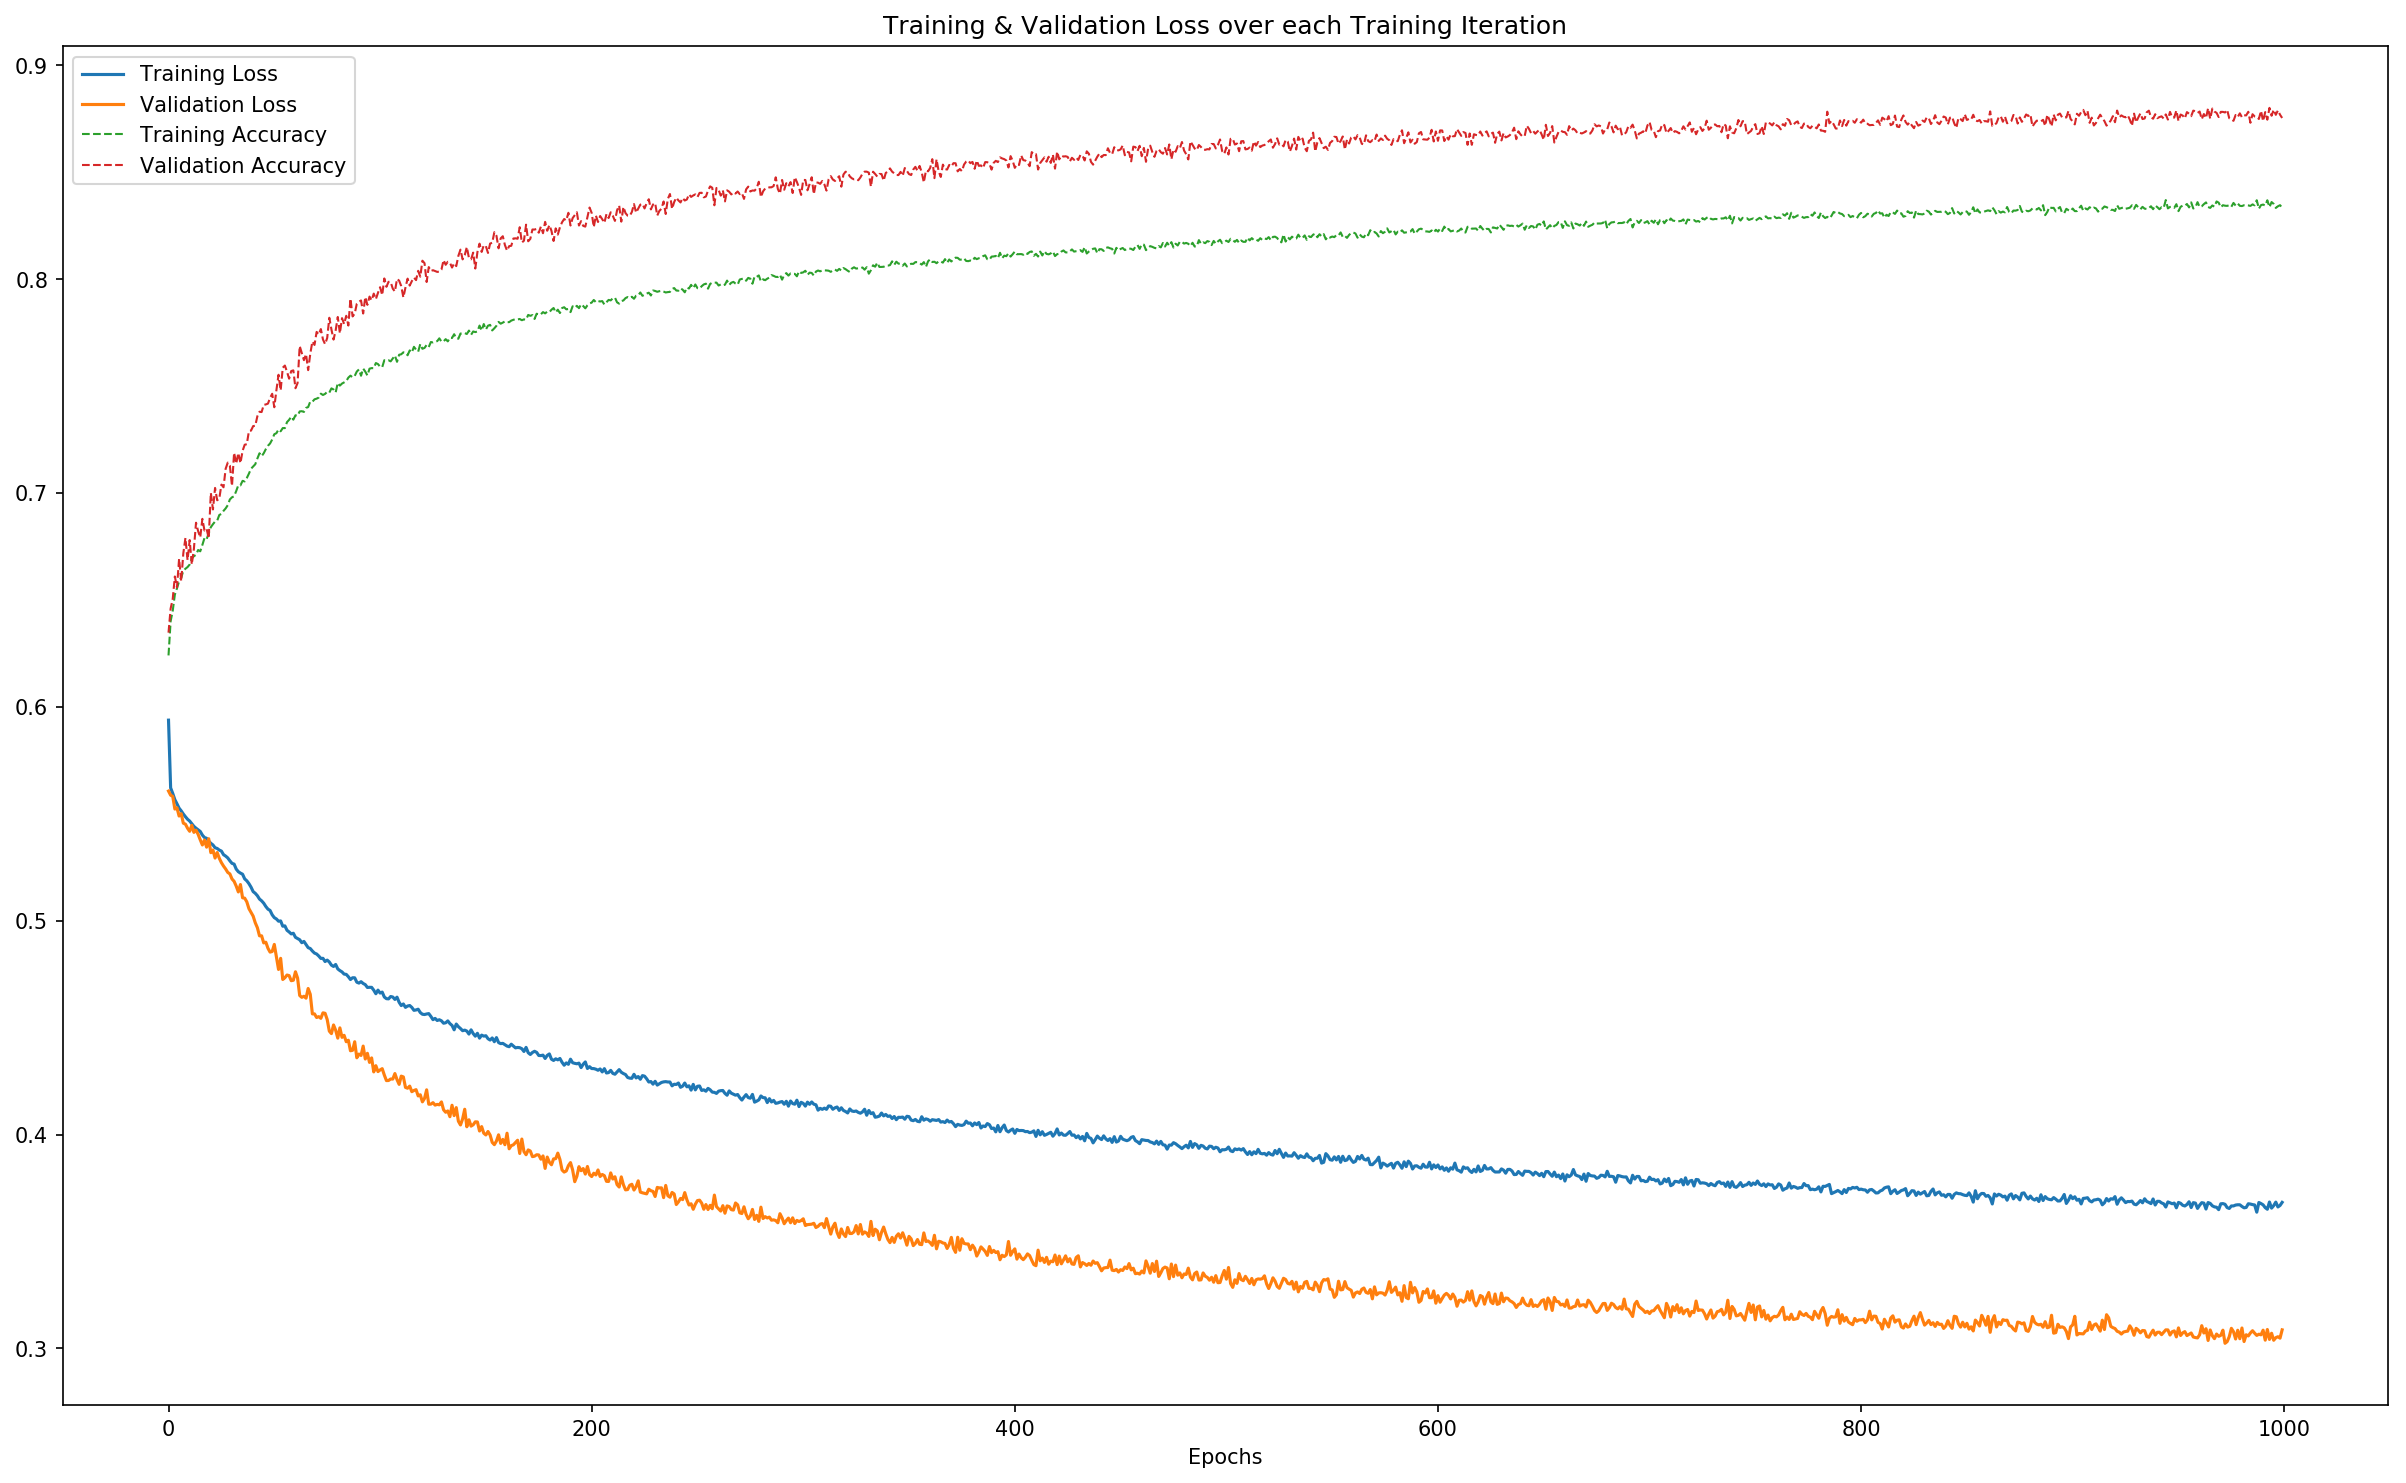

In [18]:
# plot history
plt.figure(figsize=(20,12),dpi=150)
plt.plot(history.history['loss'],  label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['acc'], '--', markersize=0.25, linewidth=1, label='Training Accuracy')
plt.plot(history.history['val_acc'], '--', markersize=0.25, linewidth=1, label='Validation Accuracy')
plt.legend()
plt.title('Training & Validation Loss over each Training Iteration')
plt.xlabel('Epochs')
plt.show()

In [19]:
print('Maximum Training Accuracy:',max(history.history['acc']))
print('Maximum Validation Accuracy:',max(history.history['val_acc']))

Maximum Training Accuracy: 0.837018361092664
Maximum Validation Accuracy: 0.8801349641602032


In [20]:
# Average Accuracy over multiple runs of the Training Iterations
print(scores,'\n')
m, s = np.mean(scores), np.std(scores)
print('Average Accuracy: %.3f%% (+/-%.3f)' % (m*100, s*100))

[0.8816920351503466, 0.8797237895211121, 0.8771486681616067] 

Average Accuracy: 87.952% (+/-0.186)
